In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline



## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
football_df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
football_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
football_df.tail()


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [5]:
football_df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
#ProfileReport(football_df)

In [7]:
football_df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [8]:
#no
#he gathered information on players competing in several top-tier global football leagues but he doesnt mention the sources ...
#... but i believe its transfermarket website but still not reliable source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [9]:
#no
#the data from 2 season 2021-2022 and 2022-2023 not 2024

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [10]:
#there is one data source so we dont do this step

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [11]:
#I will delete player column i think i will not use it in analysis, i think its the profile page in transfermarket website for the player

football_df.drop(columns="player",axis=1 , inplace=True)

In [12]:
football_df

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [13]:
#from the y datat it shows no duplicates but i will double check it

In [14]:
football_df.duplicated().sum()

0

In [15]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [16]:
#Display number missing values per column

In [17]:
##from the y datat it shows no missing values but i will double check it

In [18]:
football_df.isnull().sum().sort_values(ascending = False)

team                   0
goals conceded         0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
red cards              0
name                   0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
winger                 0
dtype: int64

In [19]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [20]:
# check columns types 

In [21]:
football_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [22]:
# go to clean them 

### Preprocess the Data

In [23]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position', 'position_encoded', 'winger']

numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded',
                    'clean sheets','minutes played', 'days_injured', 'games_injured', 'award','current_value','highest_value']

In [24]:
for i in categorical_features:
    print (football_df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64
position_encoded
2    3528
3    3095
4    

In [25]:
football_df.shape

(10754, 21)

In [26]:
#Check outliers

In [27]:
type_counts1 = football_df['team'].value_counts()

# Filter 'team' values that appear 13 or more times

df = football_df[football_df['team'].isin(type_counts1[type_counts1 >= 13].index)]

In [28]:
type_counts = df['position'].value_counts()

# Filter 'position' values that appear 76 or more times

df = df[df['position'].isin(type_counts[type_counts >= 76].index)]

In [29]:
#plt.boxplot(df['team'].value_counts());


In [30]:
df.shape

(10510, 21)

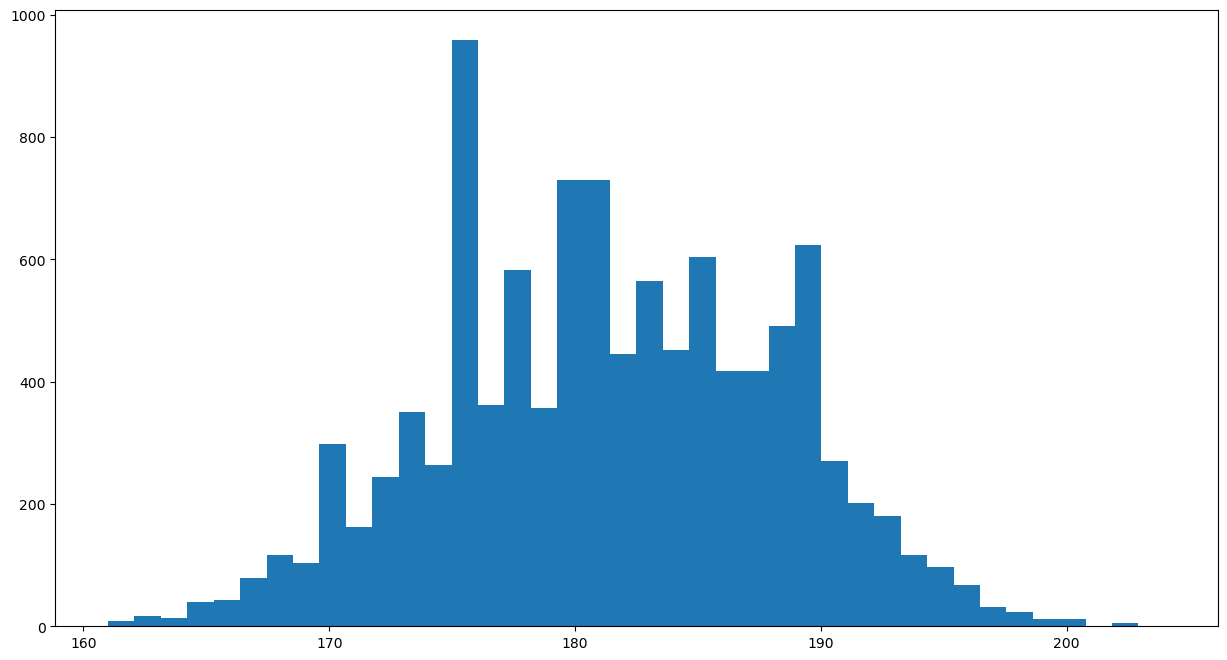

In [31]:
plt.figure(figsize=(15,8))
# show 'height' values that greater than 160 and less than or equal 205 
#plt.boxplot(df['height']);

plt.hist(df[(df['height'] > 160) & (df['height'] <= 205)]['height'], bins=40);


In [32]:
# filter 'height' values that greater than 160 and less than or equal 205 

df = df[(df['height'] > 160) & (df['height'] <= 205)]

df.shape

(10492, 21)

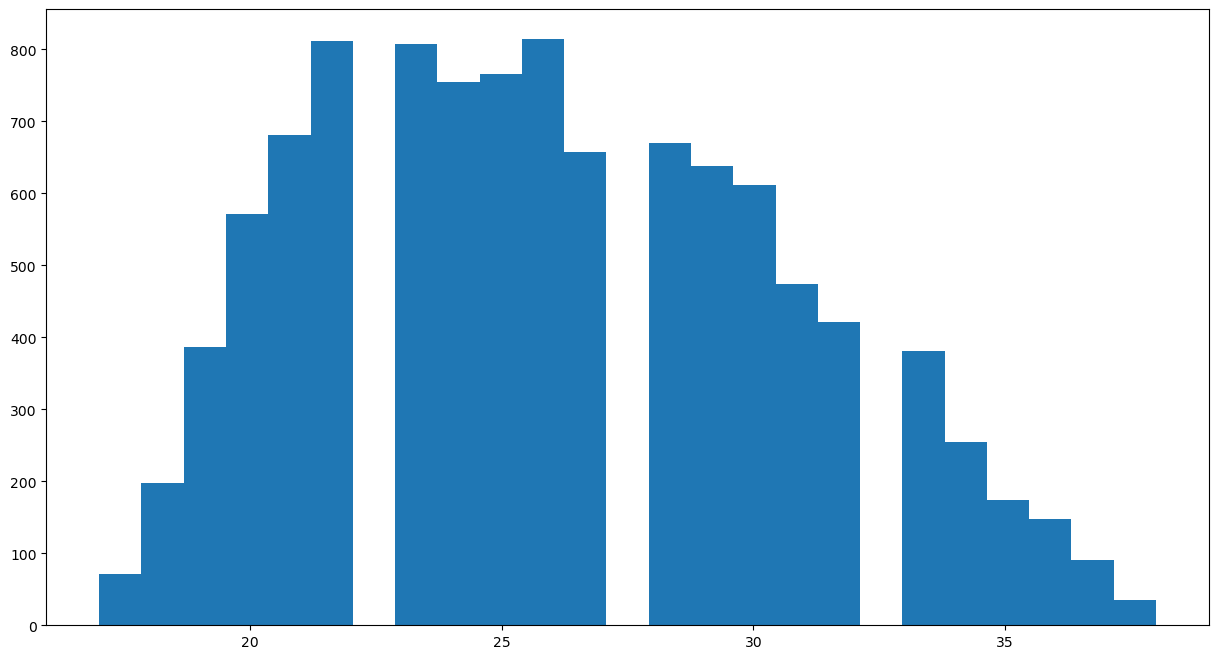

In [33]:
plt.figure(figsize=(15,8))
# show 'age' values that greater than 16 and less than or equal 38 
#plt.boxplot(football_df['age']);
plt.hist(df[(df['age'] <= 38) & (df['age'] > 16)]['age'], bins=25);

In [34]:
# show 'age' values that greater than 16 and less than or equal 38 
df = df[(df['age'] <= 38) & (df['age'] > 16)]

In [35]:
df.shape

(10421, 21)

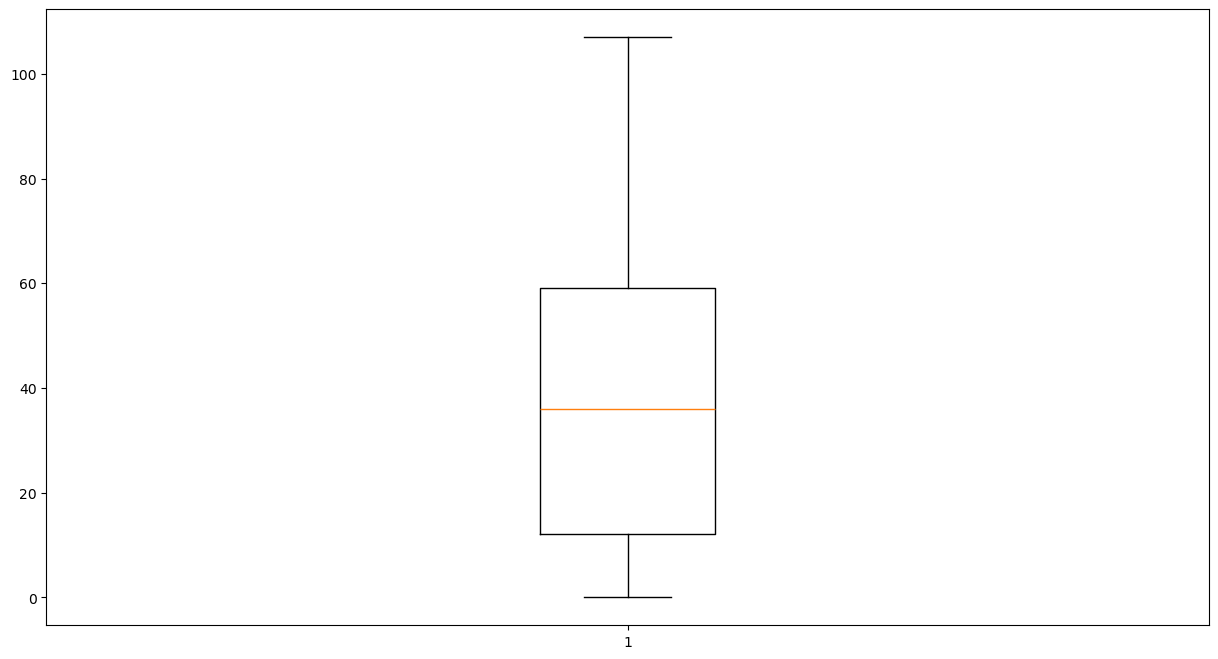

In [36]:
# show 'appearance' values upon box plot and i believe there is no outliers 

plt.figure(figsize=(15,8))
#plt.hist(df['appearance']);
plt.boxplot(df['appearance']);

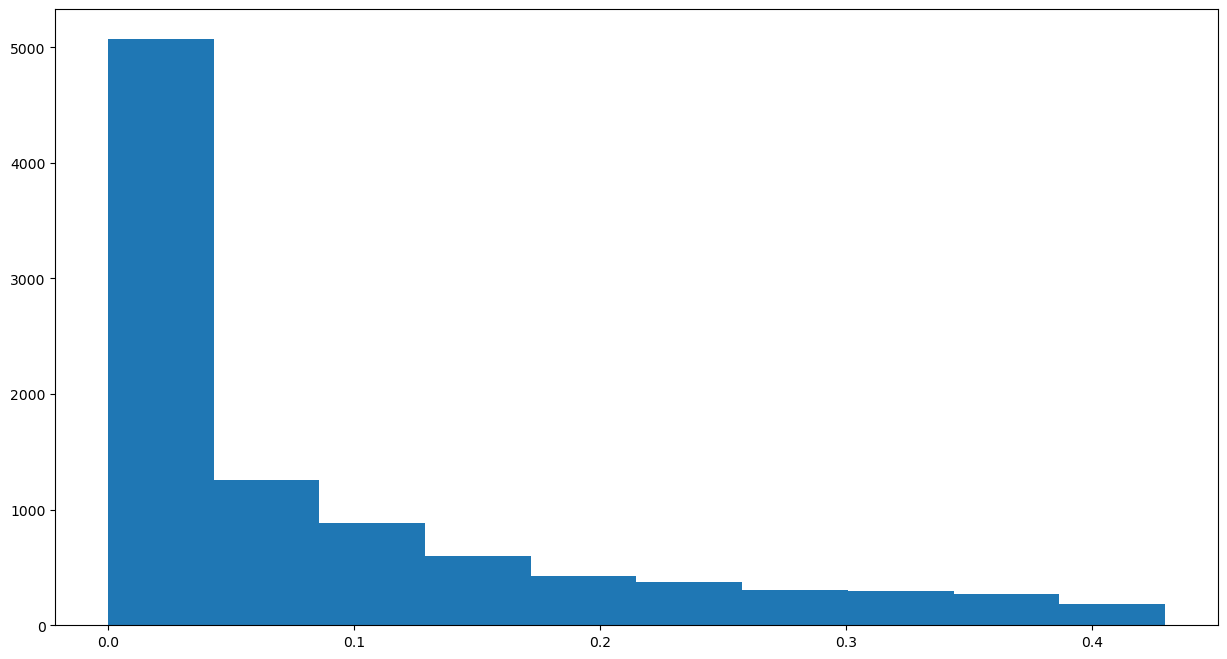

In [37]:
plt.figure(figsize=(15,8))
# show 'goals' values and do statical method for outbounding outliers
#plt.hist(df['goals']);
Q1 = df['goals'].quantile(0.25)
Q3 = df['goals'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['goals'] ,bins=30)
plt.hist(df[(df['goals'] >= Q1 - 1.5 * IQR) & (df['goals'] <= Q3 + 1.5 * IQR)]['goals']);

In [38]:
df = df[(df['goals'] >= Q1 - 1.5 * IQR) & (df['goals'] <= Q3 + 1.5 * IQR)]

In [39]:
df.shape

(9674, 21)

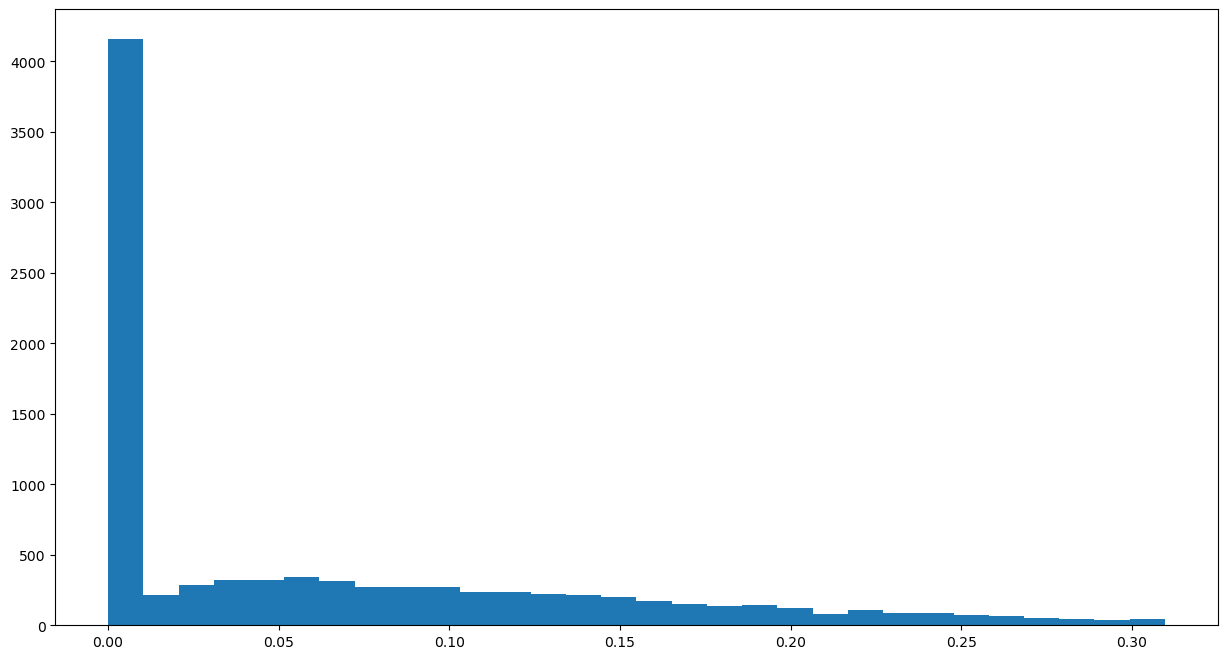

In [40]:
plt.figure(figsize=(15,8))
# show 'assists' values and do statical method for outbounding outliers
#plt.hist(df['assists']);
Q1 = df['assists'].quantile(0.25)
Q3 = df['assists'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['assists'] ,bins=30)
plt.hist(df[(df['assists'] >= Q1 - 1.5 * IQR) & (df['assists'] <= Q3 + 1.5 * IQR)]['assists'], bins=30);

In [41]:
df = df[(df['assists'] >= Q1 - 1.5 * IQR) & (df['assists'] <= Q3 + 1.5 * IQR)]

In [42]:
df.shape

(9287, 21)

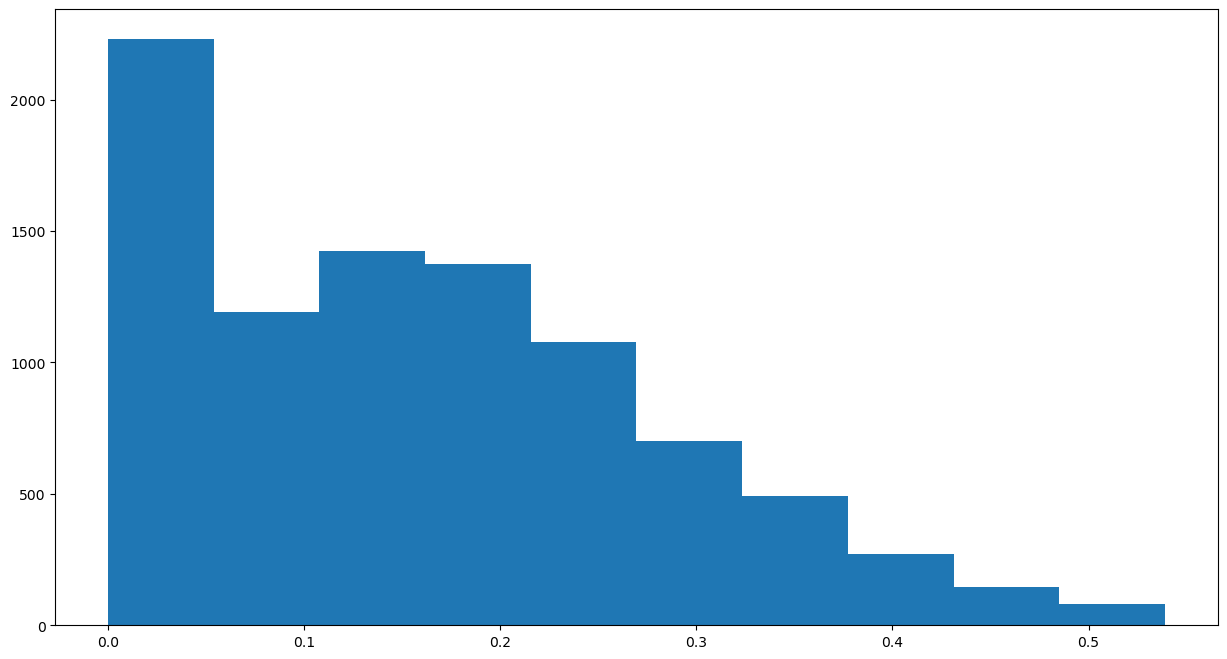

In [43]:
plt.figure(figsize=(15,8))
# show 'yellow cards' values and do statical method for outbounding outliers
#plt.hist(df['yellow cards']);
Q1 = df['yellow cards'].quantile(0.25)
Q3 = df['yellow cards'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['yellow cards'] ,bins=30)
plt.hist(df[(df['yellow cards'] >= Q1 - 1.5 * IQR) & (df['yellow cards'] <= Q3 + 1.5 * IQR)]['yellow cards']);

In [44]:
df = df[(df['yellow cards'] >= Q1 - 1.5 * IQR) & (df['yellow cards'] <= Q3 + 1.5 * IQR)]

In [45]:
df.shape

(8988, 21)

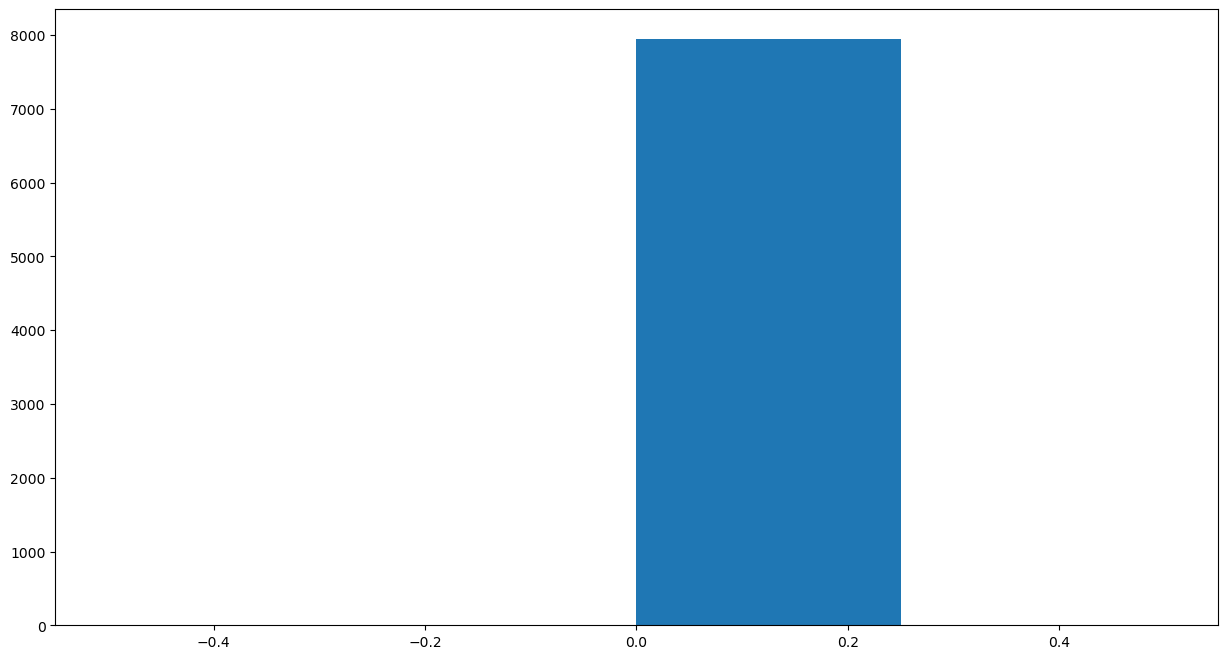

In [46]:
plt.figure(figsize=(15,8))
# show 'second yellow cards' values and do statical method to outbounding outliers
#plt.hist(df['second yellow cards']);
Q1 = df['second yellow cards'].quantile(0.25)
Q3 = df['second yellow cards'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['second yellow cards'] ,bins=30)
plt.hist(df[(df['second yellow cards'] >= Q1 - 1.5 * IQR) & (df['second yellow cards'] <= Q3 + 1.5 * IQR)]['second yellow cards'], bins=4);


In [47]:
df = df[(df['second yellow cards'] >= Q1 - 1.5 * IQR) & (df['second yellow cards'] <= Q3 + 1.5 * IQR)]

In [48]:
df.shape

(7952, 21)

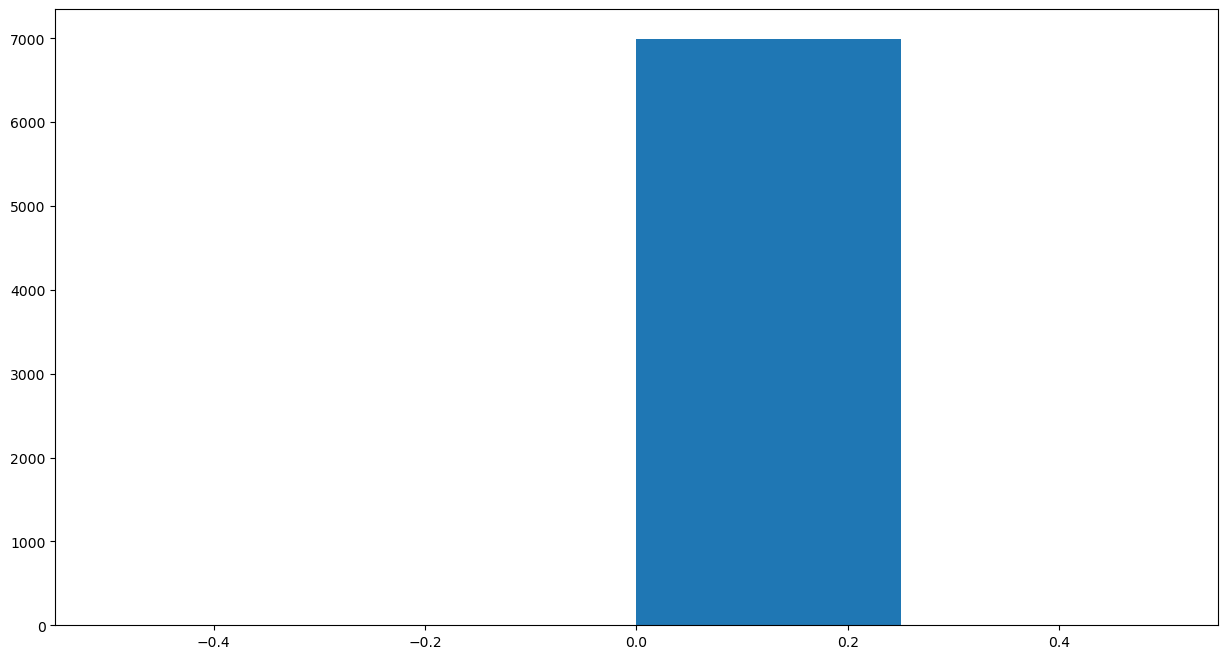

In [49]:
plt.figure(figsize=(15,8))
# show 'red cards' values and do statical method to outbounding outliers
#plt.hist(df['red cards']);
Q1 = df['red cards'].quantile(0.25)
Q3 = df['red cards'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['red cards'] ,bins=30)
plt.hist(df[(df['red cards'] >= Q1 - 1.5 * IQR) & (df['red cards'] <= Q3 + 1.5 * IQR)]['red cards'], bins=4);

In [50]:
df = df[(df['red cards'] >= Q1 - 1.5 * IQR) & (df['red cards'] <= Q3 + 1.5 * IQR)]

In [51]:
df.shape

(6998, 21)

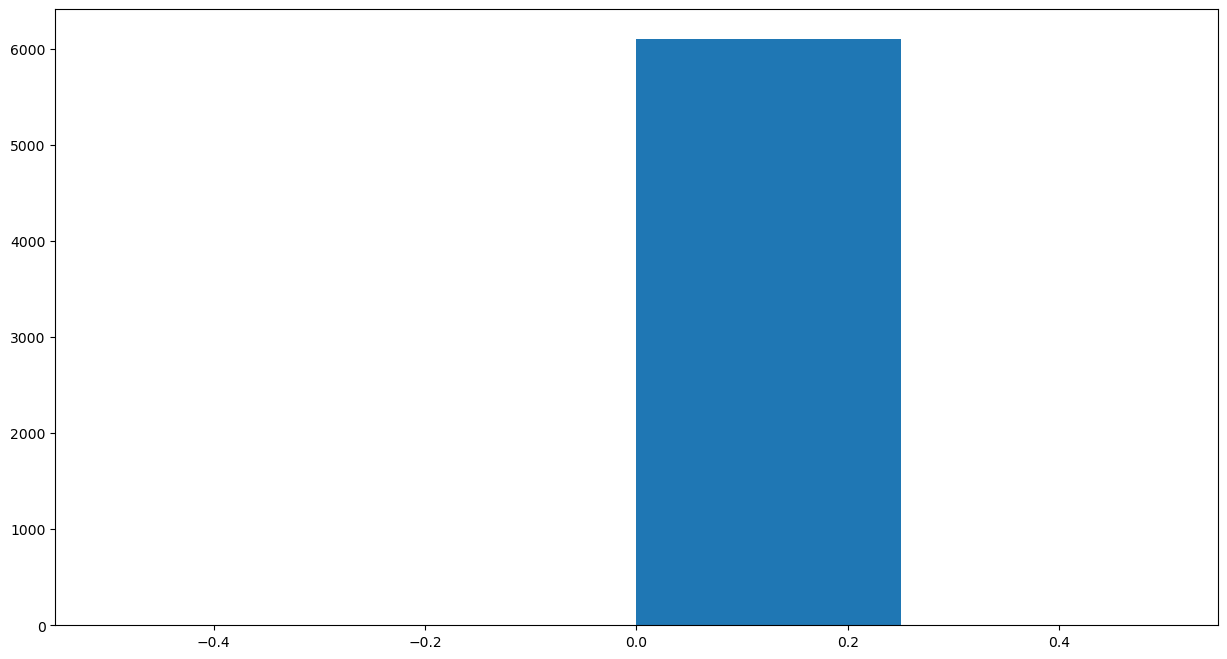

In [52]:

plt.figure(figsize=(15,8))
# show 'goals conceded' values and do statical method to outbounding outliers
#plt.hist(df['goals conceded']);
Q1 = df['goals conceded'].quantile(0.25)
Q3 = df['goals conceded'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['goals conceded'] ,bins=30)
plt.hist(df[(df['goals conceded'] >= Q1 - 1.5 * IQR) & (df['goals conceded'] <= Q3 + 1.5 * IQR)]['goals conceded'], bins=4);

In [53]:
df = df[(df['goals conceded'] >= Q1 - 1.5 * IQR) & (df['goals conceded'] <= Q3 + 1.5 * IQR)]

In [54]:
df.shape

(6111, 21)

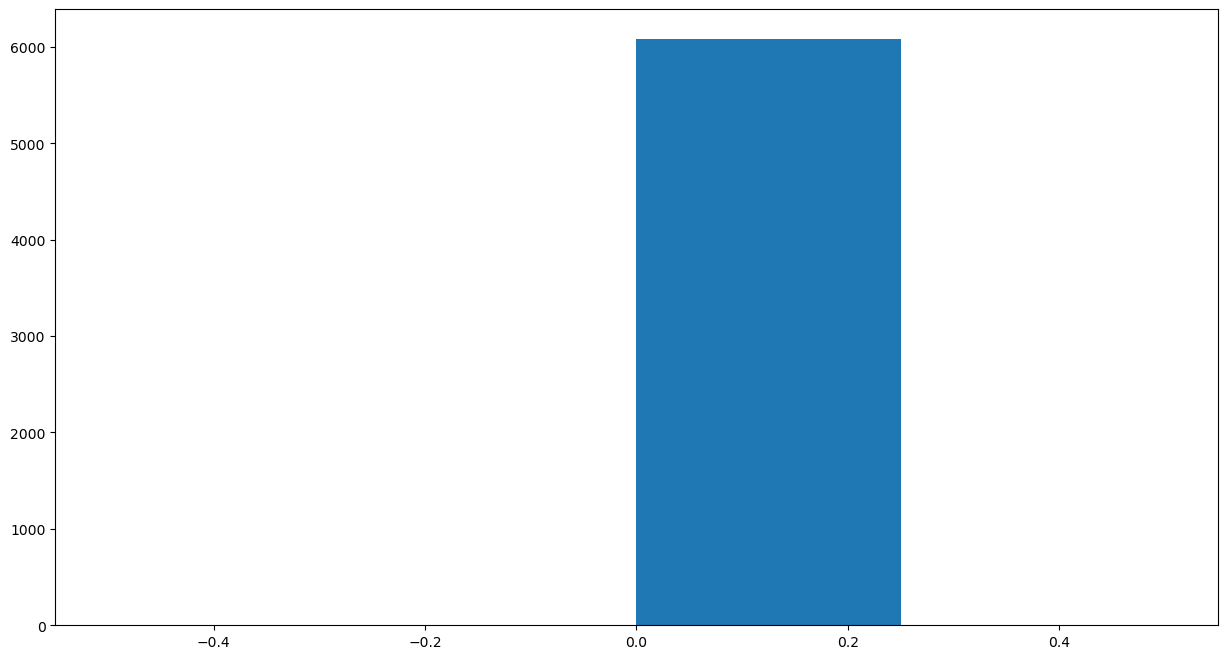

In [55]:

plt.figure(figsize=(15,8))
# show 'clean sheets' values and do statical method to outbounding outliers
Q1 = df['clean sheets'].quantile(0.25)
Q3 = df['clean sheets'].quantile(0.75)
IQR = Q3 - Q1

#plt.hist(df['clean sheets'] ,bins=20)
plt.hist(df[(df['clean sheets'] >= Q1 - 1.5 * IQR) & (df['clean sheets'] <= Q3 + 1.5 * IQR)]['clean sheets'], bins=4);

In [56]:
df = df[(df['clean sheets'] >= Q1 - 1.5 * IQR) & (df['clean sheets'] <= Q3 + 1.5 * IQR)]

In [57]:
df.shape

(6086, 21)

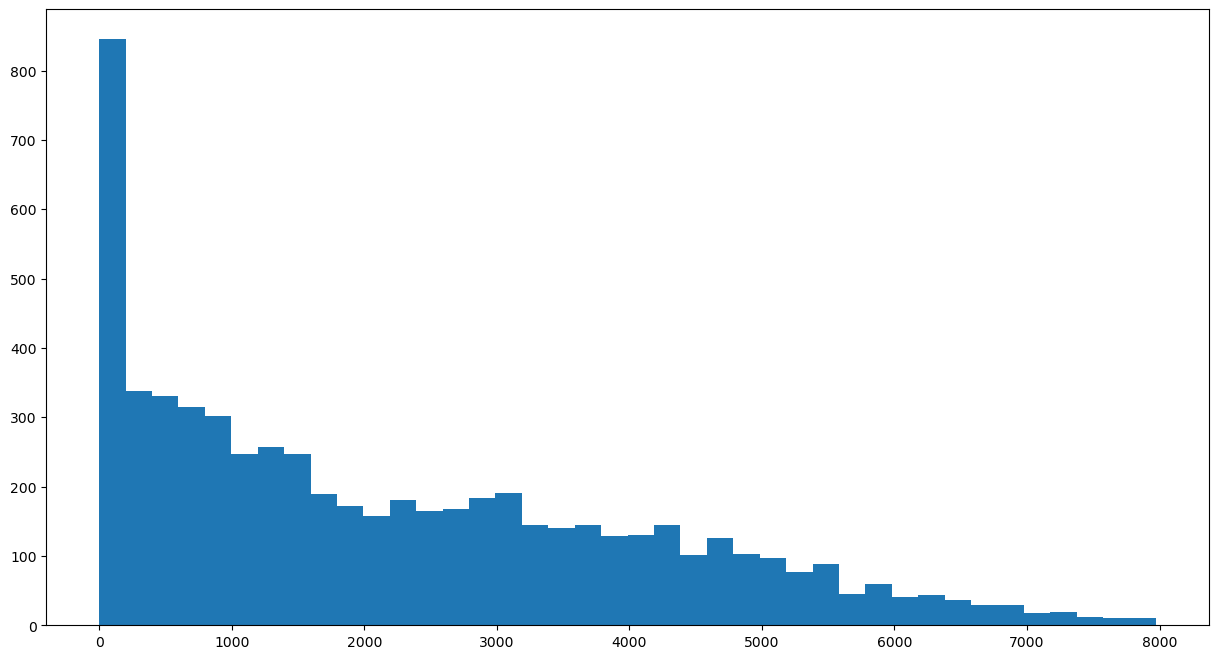

In [58]:

plt.figure(figsize=(15,8))
# show 'minutes played' values and do statical method to outbounding outliers
#plt.hist(df['minutes played']);
Q1 = df['minutes played'].quantile(0.25)
Q3 = df['minutes played'].quantile(0.75)
IQR = Q3 - Q1

#plt.hist(df['minutes played'], bins=40)
plt.hist(df[(df['minutes played'] >= Q1 - 1.5 * IQR) & (df['minutes played'] <= Q3 + 1.5 * IQR)]['minutes played'], bins=40);

In [59]:
df = df[(df['minutes played'] >= Q1 - 1.5 * IQR) & (df['minutes played'] <= Q3 + 1.5 * IQR)]

In [60]:
df.shape

(6067, 21)

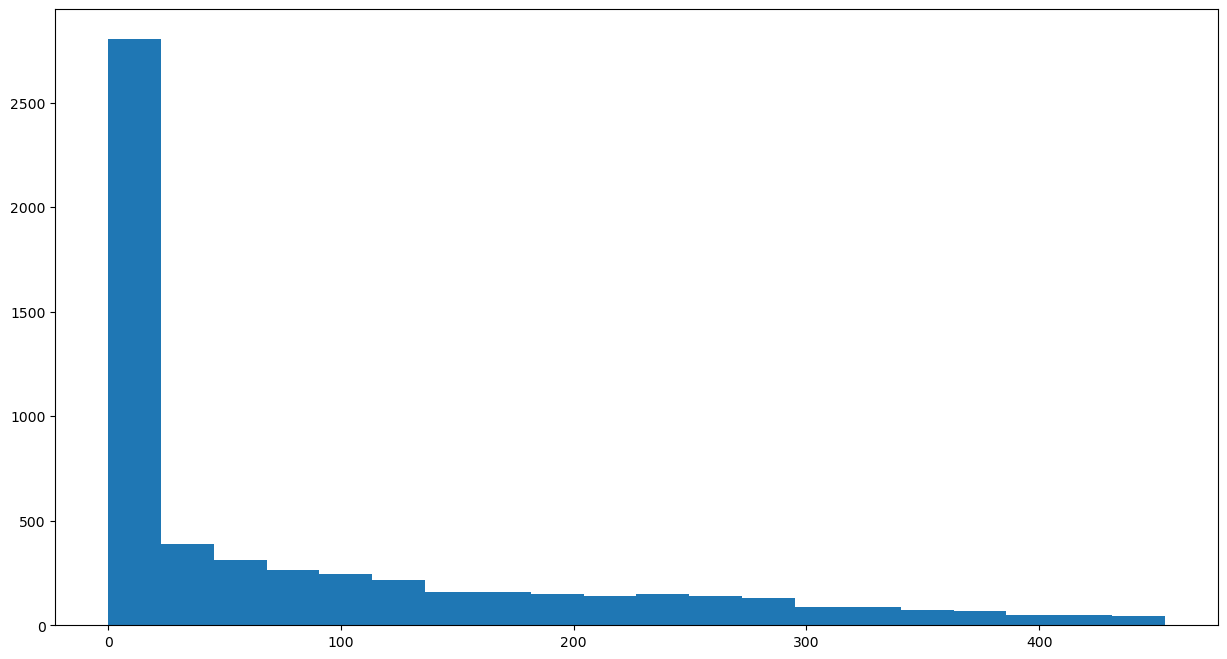

In [61]:
plt.figure(figsize=(15,8))
# show 'days_injured' values and do statical method to outbounding outliers

Q1 = df['days_injured'].quantile(0.25)
Q3 = df['days_injured'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['days_injured'], bins=40)
plt.hist(df[(df['days_injured'] >= Q1 - 1.5 * IQR) & (df['days_injured'] <= Q3 + 1.5 * IQR)]['days_injured'], bins=20);

In [62]:
#df = df[(df['days_injured'] >= Q1 - 1.5 * IQR) & (df['days_injured'] <= Q3 + 1.5 * IQR)]

In [63]:
df.shape

(6067, 21)

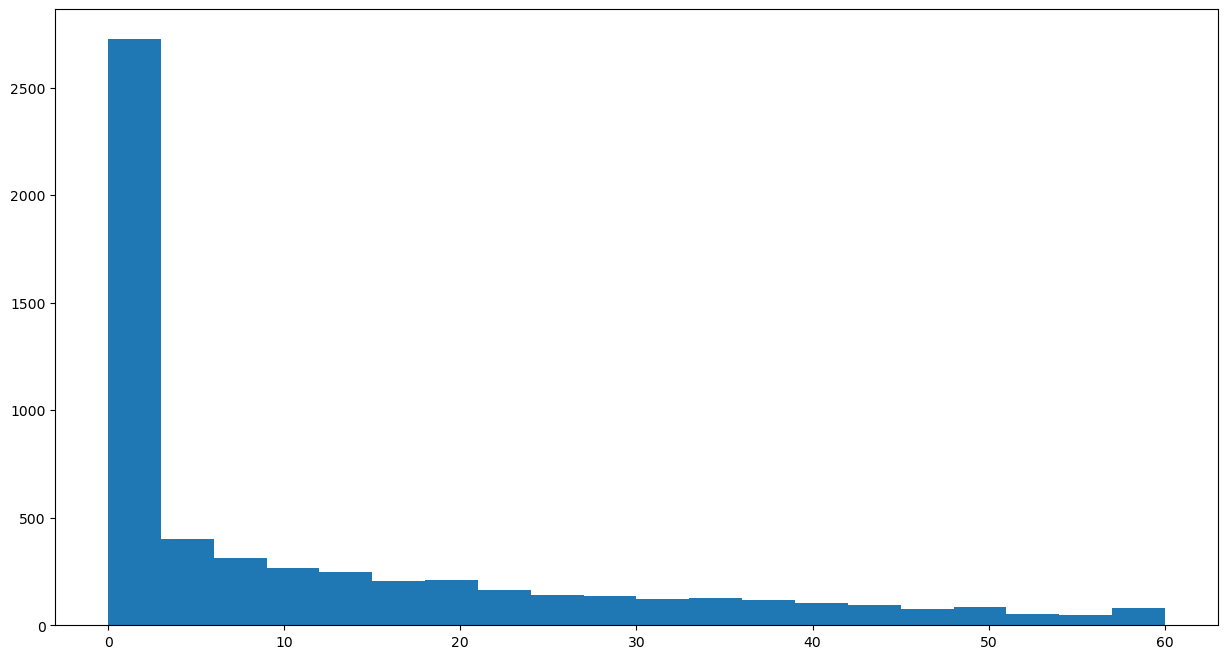

In [64]:
plt.figure(figsize=(15,8))
# show 'games_injured' values and do statical method to outbounding outliers

Q1 = df['games_injured'].quantile(0.25)
Q3 = df['games_injured'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['games_injured'], bins=40)
plt.hist(df[(df['games_injured'] >= Q1 - 1.5 * IQR) & (df['games_injured'] <= Q3 + 1.5 * IQR)]['games_injured'], bins=20);

In [65]:
df = df[(df['games_injured'] >= Q1 - 1.5 * IQR) & (df['games_injured'] <= Q3 + 1.5 * IQR)]

In [66]:
df.shape

(5718, 21)

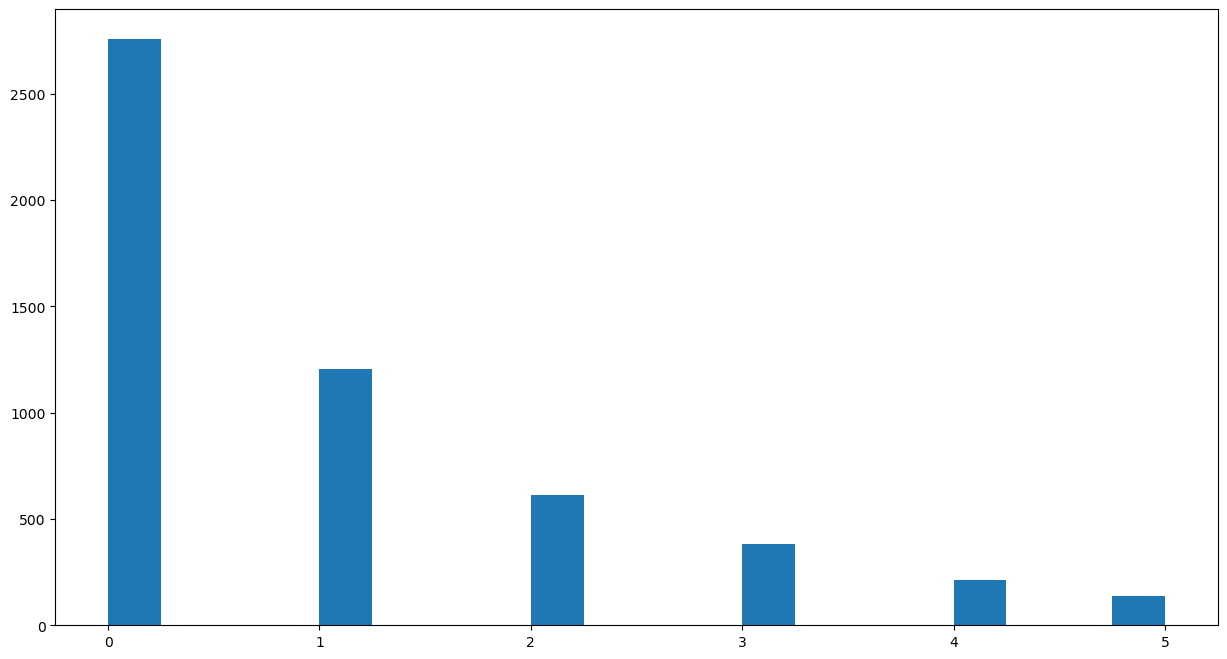

In [67]:
plt.figure(figsize=(15,8))
# show 'award' values and do statical method to outbounding outliers
#plt.hist(df['award']);
Q1 = df['award'].quantile(0.25)
Q3 = df['award'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['award'], bins=20)
plt.hist(df[(df['award'] >= Q1 - 1.5 * IQR) & (df['award'] <= Q3 + 1.5 * IQR)]['award'], bins=20);

In [68]:
df = df[(df['award'] >= Q1 - 1.5 * IQR) & (df['award'] <= Q3 + 1.5 * IQR)]

In [69]:
df.shape

(5320, 21)

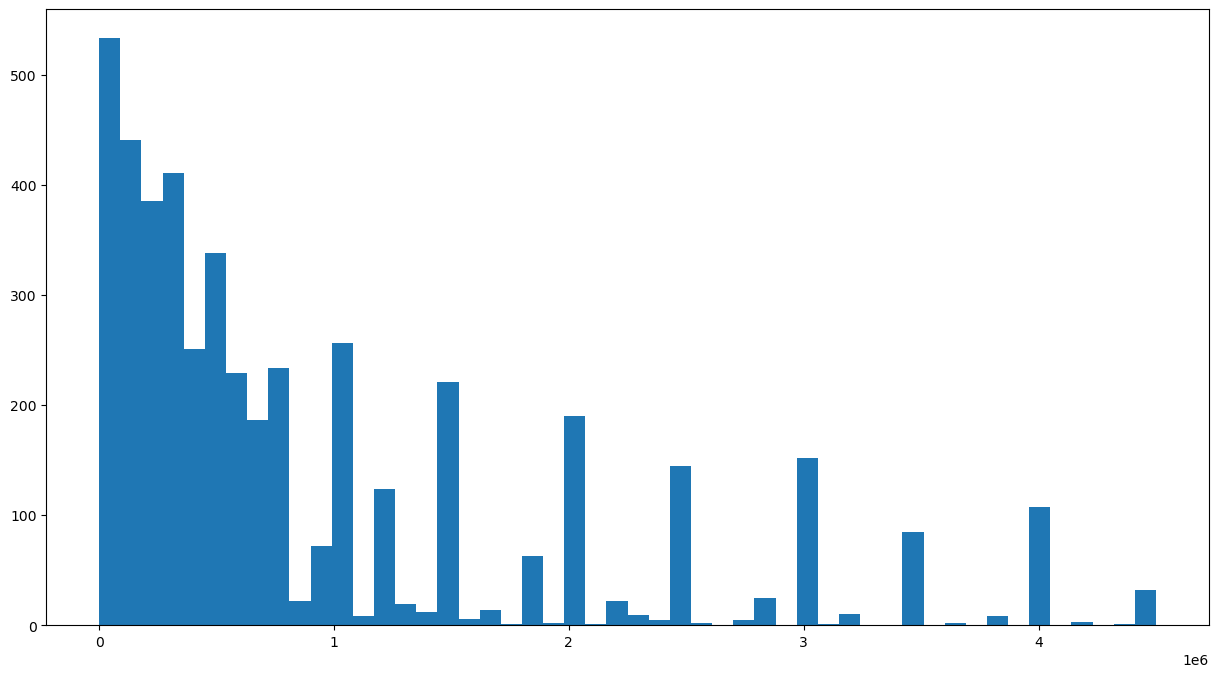

In [70]:
plt.figure(figsize=(15,8))
# show 'current_value' values and do statical method to outbounding outliers
#plt.hist(df['current_value']);
Q1 = df['current_value'].quantile(0.25)
Q3 = df['current_value'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['current_value'], bins=40)
plt.hist(df[(df['current_value'] >= Q1 - 1.5 * IQR) & (df['current_value'] <= Q3 + 1.5 * IQR)]['current_value'], bins=50);

In [71]:
df = df[(df['current_value'] >= Q1 - 1.5 * IQR) & (df['current_value'] <= Q3 + 1.5 * IQR)]

In [72]:
df.shape

(4633, 21)

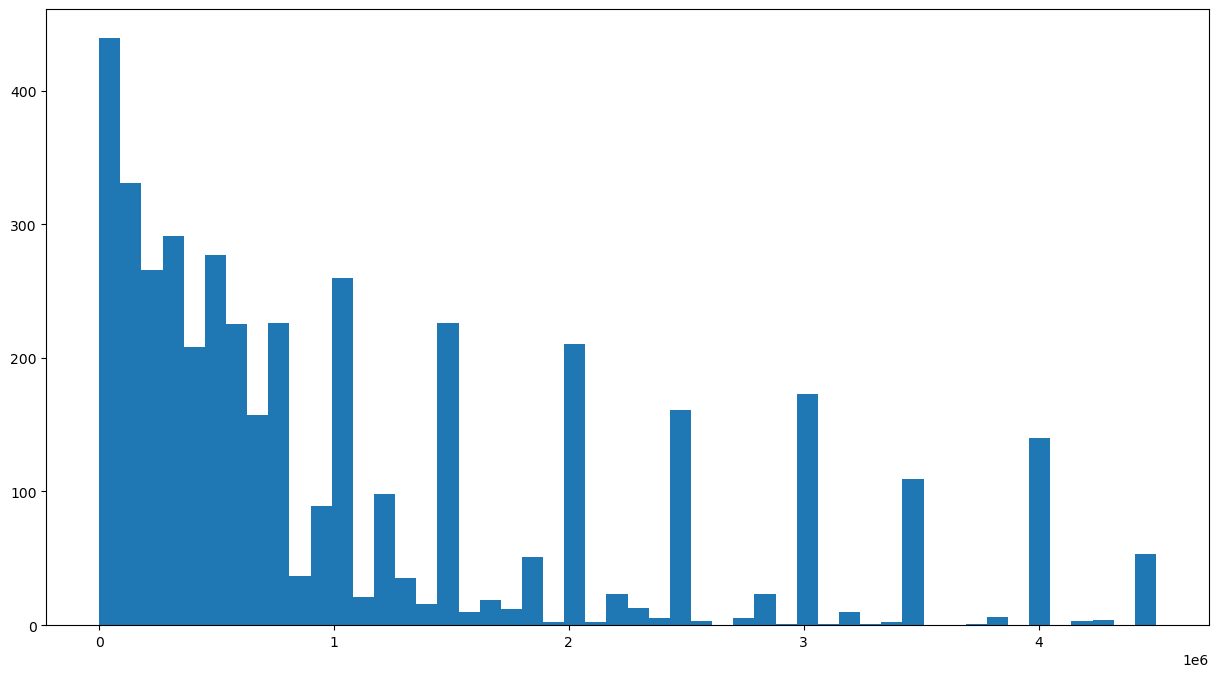

In [73]:
plt.figure(figsize=(15,8))
# show 'highest_value' values and do statical method to outbounding outliers
#plt.hist(df['highest_value']);
Q1 = df['highest_value'].quantile(0.25)
Q3 = df['highest_value'].quantile(0.75)
IQR = Q3 - Q1


#plt.hist(df['highest_value'], bins=40)
plt.hist(df[(df['highest_value'] >= Q1 - 1.5 * IQR) & (df['highest_value'] <= Q3 + 1.5 * IQR)]['highest_value'], bins=50);

In [74]:
df = df[(df['highest_value'] >= Q1 - 1.5 * IQR) & (df['highest_value'] <= Q3 + 1.5 * IQR)]

In [75]:
df.shape

(4245, 21)

### Feature engineering


In [76]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.0,0.0,2788,0,0,1,800000,800000,3,0


In [77]:
categorical_features

['team', 'position', 'position_encoded', 'winger']

In [78]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [79]:
df.shape

(4245, 387)

In [80]:
df.head(2)

,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,position_encoded_1,position_encoded_2,position_encoded_3,position_encoded_4,winger_0,winger_1
8,Teden Mengi,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
20,Zidane Iqbal,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False


### Feature selection

In [81]:
df1 = df
df1.drop(columns=['name'], axis=1, inplace=True)
correlation = df1.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.826573
minutes played         0.358385
appearance             0.347069
assists                0.205718
                         ...   
position_encoded_1    -0.139907
second yellow cards         NaN
red cards                   NaN
goals conceded              NaN
clean sheets                NaN
Name: current_value, Length: 386, dtype: float64


In [82]:
# Set the correlation threshold
threshold = 0.25 

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value'], dtype='object')

In [83]:
selected_features = ['appearance', 'minutes played', 'current_value', 'highest_value']

In [84]:
df1 = df1[selected_features]
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,position_encoded_1,position_encoded_2,position_encoded_3,position_encoded_4,winger_0,winger_1
8,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
20,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
21,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,True,False
113,180.0,20.0,46,0.110735,0.276838,0.083051,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,True
118,172.0,20.0,38,0.185644,0.074257,0.259901,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,True,False


### Prepare train and test data

In [85]:
# Prepare data
X = df1.drop(['current_value'], axis=1)
y = df1['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X.shape

(4245, 3)

### Buliding the Model¶

In [87]:
model = LinearRegression()

### Train the Model

In [88]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

### Test the Model

In [89]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

### Interpretation of the Model

In [90]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-124666.595493
minutes played,187845.730084
highest_value,725642.557130


In [91]:
print(model.intercept_) 

811037.9858657244


### Evaluating the Model

In [92]:
y_base = [y_train.mean()] * len(y_test)

In [93]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 886895305294.4747


In [94]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 259270274744.86963
Mean Squared Error for testing: 254564871828.7932


##### Mean Absolute Error

In [95]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 697099.3467683868


In [96]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 303691.75163313164
Mean Absolute Error for testing: 305829.5893649967


#### Root Mean Squared Error

In [97]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 834.9247551536527


In [98]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')


Root Mean Squared Error for training: 509185.89409455325
Root Mean Squared Error for testing: 504544.2218763319


### 

R Square

In [99]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6843634581307975
R Square for testing: 0.7126061628389135


#### Predictions vs. Real Values

In [100]:
predictions = model.predict(X_test_scaled)
#predictions

In [101]:
Real_Values = np.array(y_test)
#Real_Values

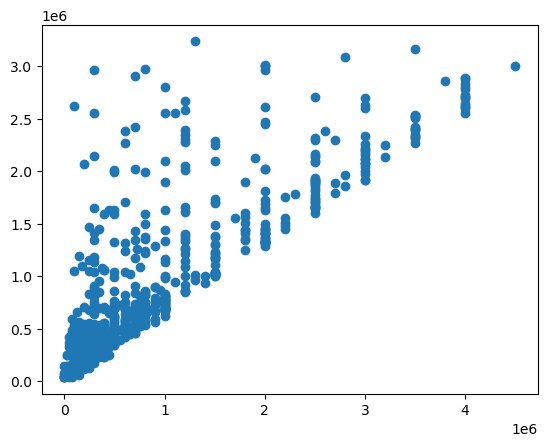

In [102]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

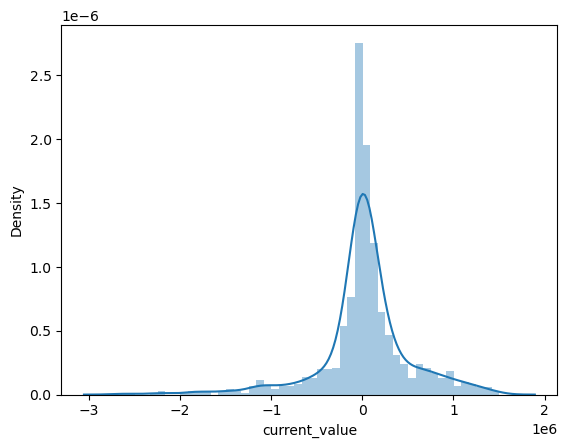

In [103]:
sns.distplot((y_test-predictions),bins=50); 